# 1. Setup and Data Loading

This initial section handles the necessary imports, sets up file paths, and defines the visual style for our plots. We then load the final analytical dataset, which includes all the features created during the preprocessing and feature engineering phases.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from pathlib import Path

# --- Configuration ---
OUTPUT_DIR = Path("../output")
DATA_FILE = OUTPUT_DIR / "readmissions_dataset.parquet"

# --- Plotting Style ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Adjusted for better readability

# --- Load Data ---
df = pd.read_parquet(DATA_FILE)

print(f"Dataset loaded with {df.shape[0]:,} rows and {df.shape[1]} columns.")
display(df.head())

Dataset loaded with 104,068 rows and 21 columns.


,encounter_id,patient_id,readmitted_within_30_days,length_of_stay,age_at_admission,gender,race,marital_status,admission_reason,admission_reason_detail,...,total_claim_cost,income,admission_day_of_week,primary_diagnosis_code,provider_id,payer_dx_interaction,prior_admissions_last_year,num_diagnoses,num_procedures,num_medications
0,ef5d7e9f-956d-2b7a-a4a6-c632f3b40cf9,1f167660-c201-84b9-f69a-16d19d622bfa,1,7,60,male,White,M,Patient transfer to intensive care unit (proce...,History of coronary artery bypass grafting (si...,...,67106.281250,99505,Wednesday,399261000,us-npi|9999868992,Blue Cross Blue Shield_399261000,0,0.0,24.0,0.0
1,3c5e1be2-468a-e4d8-11f2-e767d59482d5,1f167660-c201-84b9-f69a-16d19d622bfa,0,1,60,male,White,M,Admission to ward (procedure),History of coronary artery bypass grafting (si...,...,2176.229980,99505,Wednesday,399261000,us-npi|9999868992,Blue Cross Blue Shield_399261000,1,0.0,4.0,0.0
2,6f06a6aa-a1da-bcd6-a43f-ddbbd638947c,68bfa4c8-e3ac-6dda-a02a-a225c0b2c9a5,0,1,35,female,White,M,Admission to surgical department (procedure),Sterilization requested (situation),...,4495.109863,119210,Saturday,183996000,us-npi|9999952390,NO_INSURANCE_183996000,0,1.0,2.0,0.0
3,e2477992-082b-69ca-3152-6fecf4442626,45ccdf82-db5c-3947-2d97-ee18a8a9c4e3,0,12,53,female,White,W,Hospital admission for isolation (procedure),Disease caused by severe acute respiratory syn...,...,37806.300781,60503,Saturday,840539006,us-npi|9999943399,Anthem_840539006,0,4.0,27.0,0.0
4,735f3287-d205-1ec8-9668-fcdac03f306a,a5a065d0-a35b-d8e3-fda6-0e92c0a40926,0,1,63,female,White,M,Admission to intensive care unit (procedure),Chronic congestive heart failure (disorder),...,4361.350098,49355,Monday,88805009,us-npi|9999868992,Medicare_88805009,0,0.0,5.0,0.0


In [6]:
# --- Initial Data Overview ---

# Get a concise summary of the dataframe
print("--- Dataframe Info ---")
df.info()

# Generate descriptive statistics for numeric columns
print("\n--- Numeric Columns Summary ---")
display(df.describe().T)

# Generate descriptive statistics for object/categorical columns
print("\n--- Categorical Columns Summary ---")
display(df.describe(include=['object', 'category']).T)

--- Dataframe Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104068 entries, 0 to 104067
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   encounter_id                104068 non-null  object 
 1   patient_id                  104068 non-null  object 
 2   readmitted_within_30_days   104068 non-null  int32  
 3   length_of_stay              104068 non-null  int64  
 4   age_at_admission            104068 non-null  int64  
 5   gender                      104068 non-null  object 
 6   race                        104068 non-null  object 
 7   marital_status              104068 non-null  object 
 8   admission_reason            104068 non-null  object 
 9   admission_reason_detail     104063 non-null  object 
 10  payer                       104068 non-null  object 
 11  total_claim_cost            104068 non-null  float32
 12  income                      101109 non-null  Int6

,count,mean,std,min,25%,50%,75%,max
readmitted_within_30_days,104068.0,0.178095,0.382595,0.0,0.0,0.0,0.0,1.0
length_of_stay,104068.0,6.91717,14.102942,0.0,1.0,4.0,8.0,3306.0
age_at_admission,104068.0,50.162759,19.497225,0.0,36.0,52.0,65.0,111.0
total_claim_cost,104068.0,26483.039062,36967.523438,119.830002,2176.22998,11317.589844,37647.003906,789795.3125
income,101109.0,74739.560079,121880.470927,3.0,21660.0,43662.0,81741.0,998350.0
prior_admissions_last_year,104068.0,2.039032,3.557021,0.0,0.0,0.0,2.0,14.0
num_diagnoses,104068.0,0.377984,0.719728,0.0,0.0,0.0,1.0,8.0
num_procedures,104068.0,9.333936,15.938124,0.0,0.0,4.0,12.0,176.0
num_medications,104068.0,0.183995,0.818711,0.0,0.0,0.0,0.0,9.0



--- Categorical Columns Summary ---


,count,unique,top,freq
encounter_id,104068,104068,2d84d72d-068f-7406-d3b5-41e9ac783724,1
patient_id,104068,41303,381c0842-4f27-174d-882c-31f504165c09,71
gender,104068,2,male,54955
race,104068,6,White,83277
marital_status,104068,4,M,57311
admission_reason,104068,19,Encounter for problem (procedure),34161
admission_reason_detail,104063,40,"Non-small cell carcinoma of lung, TNM stage 1 ...",20107
payer,104068,10,Medicare,48227
admission_day_of_week,104068,7,Tuesday,15014
primary_diagnosis_code,104063,40,424132000,20107


# 2. Target Variable Analysis: Readmission Rate

Now, we will analyze the distribution of our **target variable**, `readmitted_within_30_days`. This is a critical step in any classification problem as it allows us to check for **class imbalance**. Understanding this imbalance is key to selecting appropriate evaluation metrics and modeling techniques. A model trained on imbalanced data might become biased towards the majority class, which in a clinical setting, could be highly undesirable.

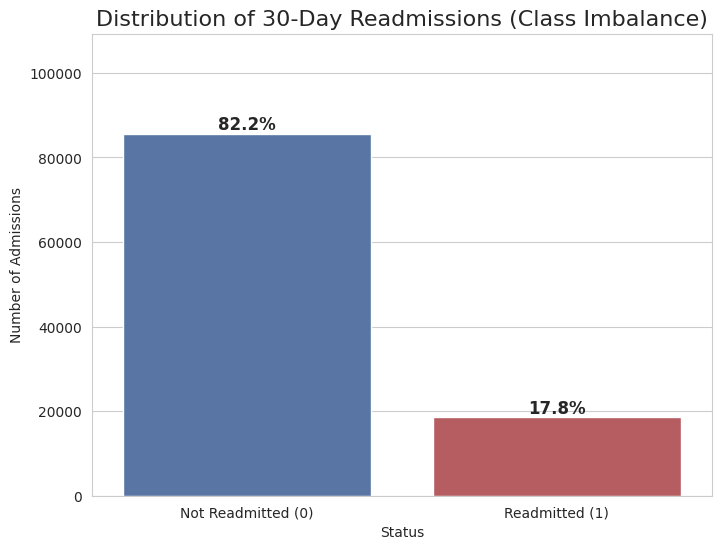

In [7]:
# --- Calculate Proportion ---
target_pcts = df['readmitted_within_30_days'].value_counts(normalize=True) * 100

# --- Visualize the Distribution ---
plt.figure(figsize=(8, 6))
# Assign 'x' to 'hue' and set legend=False to resolve the FutureWarning
ax = sns.countplot(
    x='readmitted_within_30_days', 
    data=df, 
    palette=['#4c72b0', '#c44e52'],
    hue='readmitted_within_30_days',
    legend=False
)

# Add annotations
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.01 * df.shape[0], # Position text slightly above the bar
        f'{target_pcts.iloc[i]:.1f}%',
        ha="center",
        fontsize=12,
        fontweight='bold'
    )

plt.title('Distribution of 30-Day Readmissions (Class Imbalance)', fontsize=16)
# Set tick locations explicitly before labels to resolve the UserWarning
ax.set_xticks([0, 1]) 
ax.set_xticklabels(['Not Readmitted (0)', 'Readmitted (1)'])
plt.ylabel('Number of Admissions')
plt.xlabel('Status')
plt.ylim(0, df.shape[0] * 1.05) # Adjust y-limit to make space for text
plt.show()

# 3. Univariate Analysis: Exploring Feature Distributions

In this section, we examine the distribution of each feature individually. This helps us identify characteristics like skewness, outliers, and the frequency of different categories, which are crucial for feature engineering and for understanding the model's behavior. We will analyze numeric and categorical features separately.

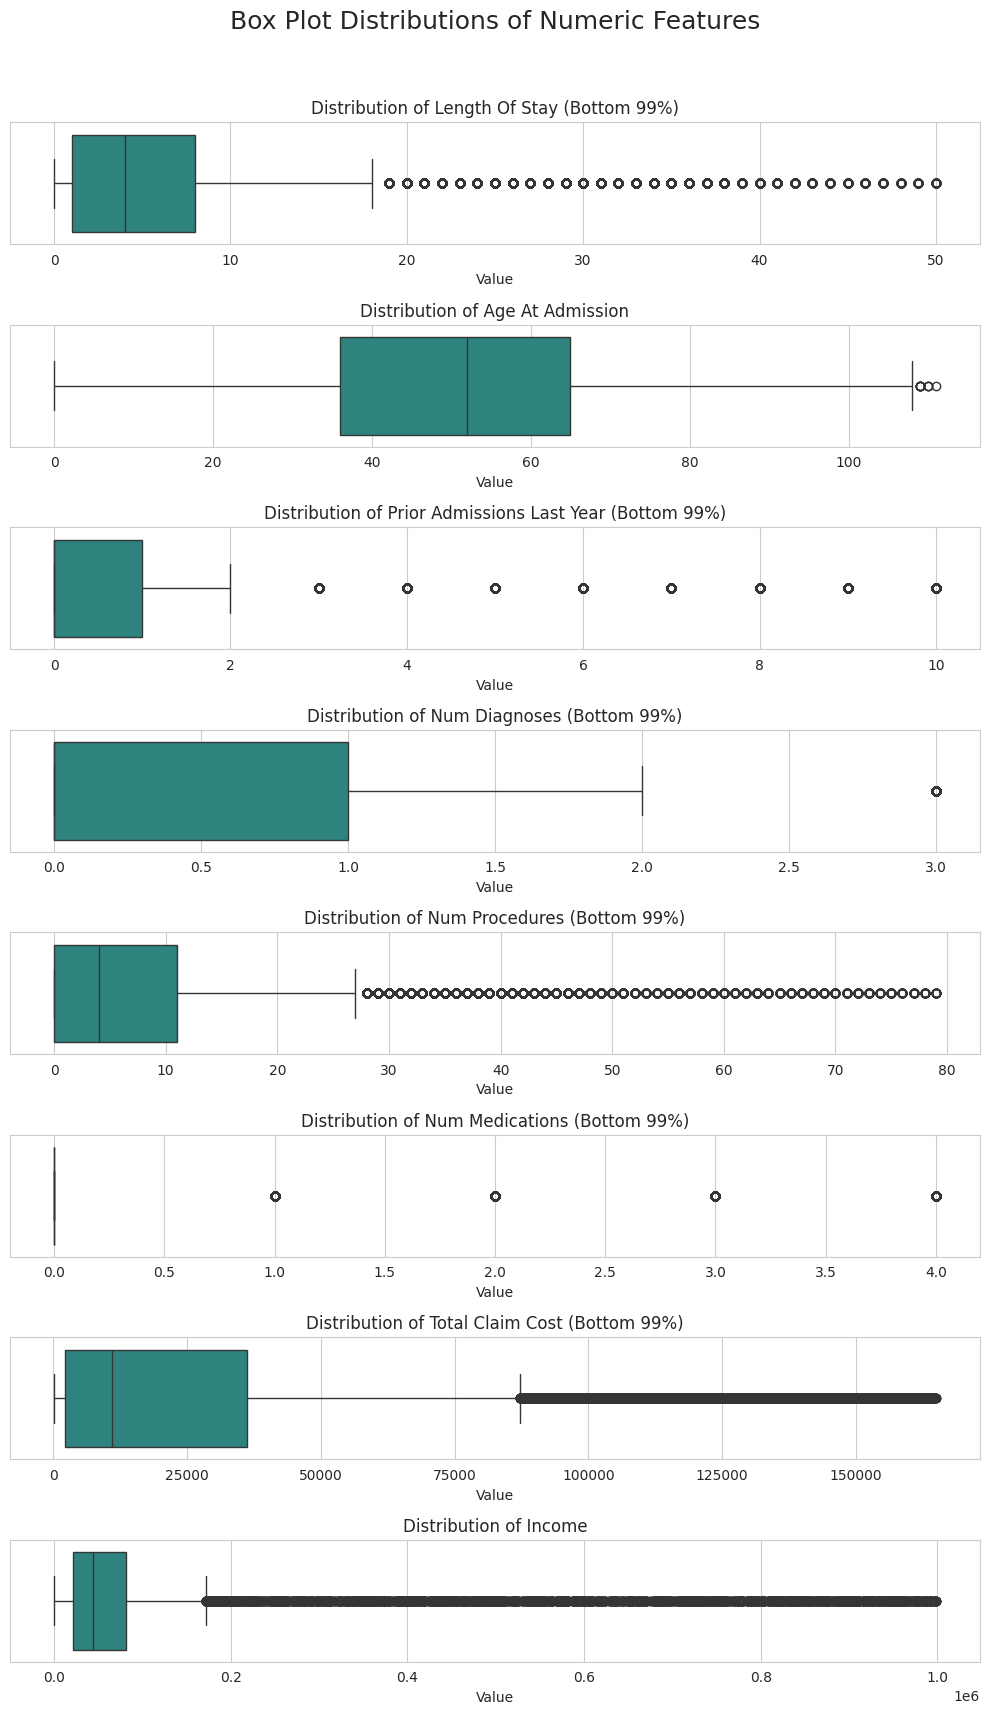

In [21]:
numeric_features = [
    'length_of_stay', 'age_at_admission', 'prior_admissions_last_year',
    'num_diagnoses', 'num_procedures', 'num_medications',
    'total_claim_cost', 'income'
]

# Create a figure with subplots
fig, axes = plt.subplots(len(numeric_features), 1, figsize=(10, 18))
fig.suptitle('Box Plot Distributions of Numeric Features', fontsize=18, y=0.95)

for i, col in enumerate(numeric_features):
    # This is the improved logic
    if col in ['age_at_admission', 'income']:
        plot_df = df
        title = f'Distribution of {col.replace("_", " ").title()}'
    else:
        p99 = df[col].quantile(0.99)
        plot_df = df[df[col] < p99]
        title = f'Distribution of {col.replace("_", " ").title()} (Bottom 99%)'

    sns.boxplot(
        x=plot_df[col],
        ax=axes[i],
        palette='viridis',
        orient='h',
        hue=[0] * len(plot_df),  # This line resolves the FutureWarning
        legend=False
    )
    axes[i].set_title(title, fontsize=12)
    axes[i].set_xlabel('Value')

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

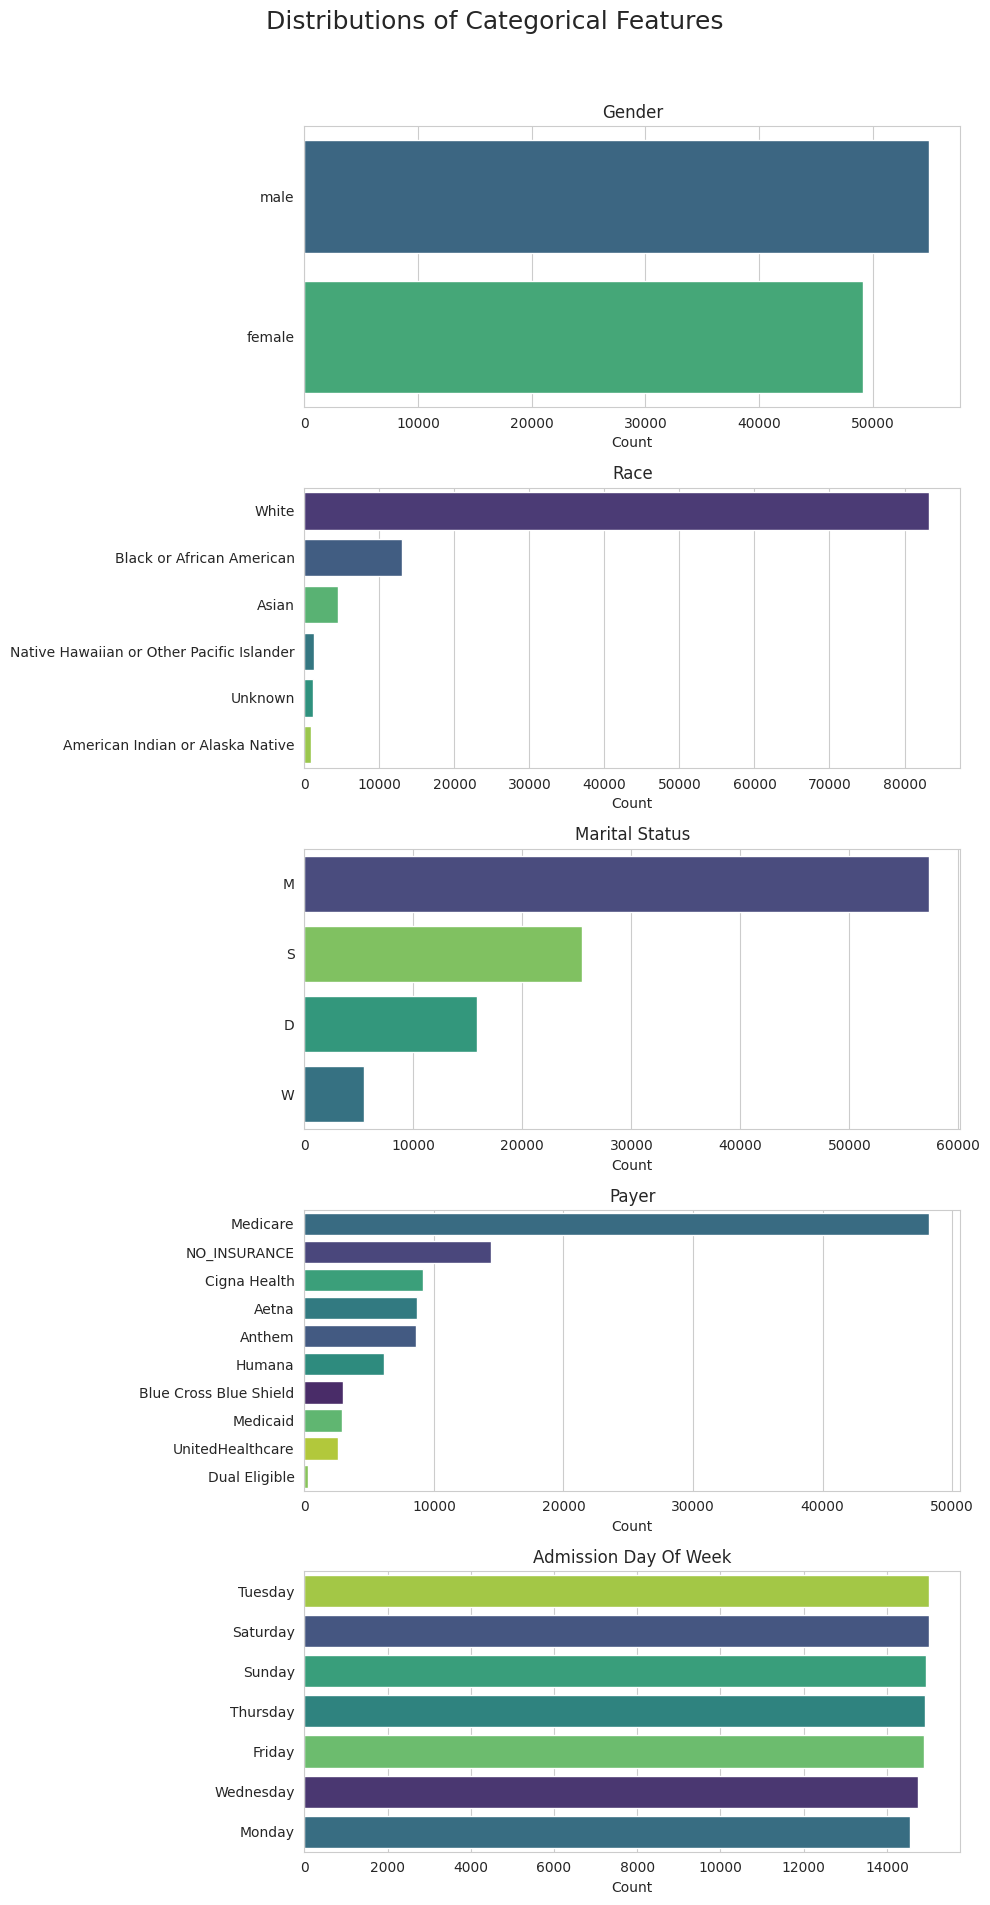

In [20]:
# --- 3.2 Categorical Features ---
# For categorical features, we'll use count plots to see the frequency of each category.
# Note: We exclude high-cardinality features like 'provider_id' here; their relationship 
# with the target is more meaningful to explore in the next section.

categorical_features_to_plot = [
    'gender', 'race', 'marital_status',
    'payer', 'admission_day_of_week'
]

# Create a figure with subplots
fig, axes = plt.subplots(len(categorical_features_to_plot), 1, figsize=(10, 20))
fig.suptitle('Distributions of Categorical Features', fontsize=18, y=0.95)

for i, col in enumerate(categorical_features_to_plot):
    order = df[col].value_counts().index
    sns.countplot(
        y=col,
        data=df,
        order=order,
        ax=axes[i],
        palette='viridis',
        hue=col,  # Added this line to fix the FutureWarning
        legend=False # Added this line to fix the FutureWarning
    )
    axes[i].set_title(col.replace("_", " ").title(), fontsize=12)
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


# 4 Bivariate Analysis (Features vs. Target)
This cell is performing a bivariate analysis to examine the relationship between each manageable categorical feature and the target variable, readmitted_within_30_days.  The original code calculates the percentage of patients who were readmitted and those who were not for each category. It then creates a stacked bar chart to visualize these percentages, allowing you to see the distribution of readmission status within each category.  By sorting the bars by the readmission rate (readmitted), it's easy to identify which categories have the highest readmission rates.

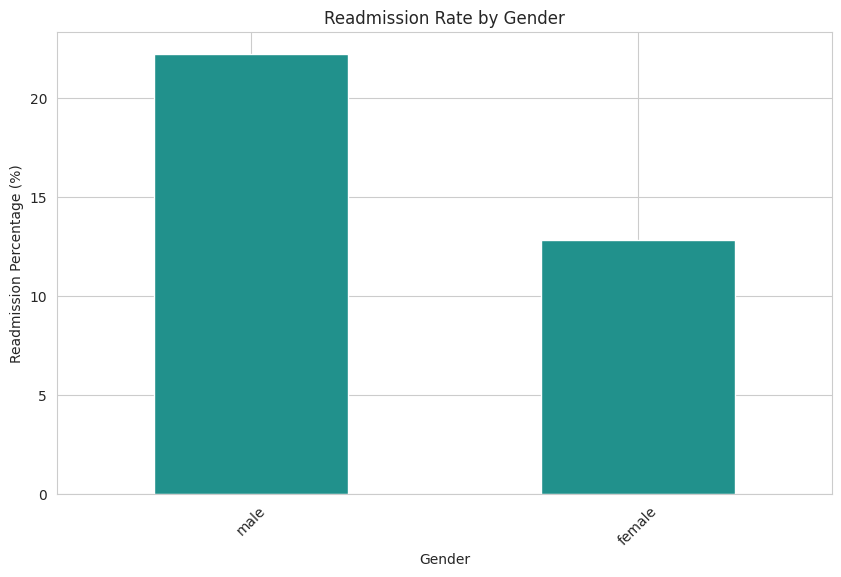

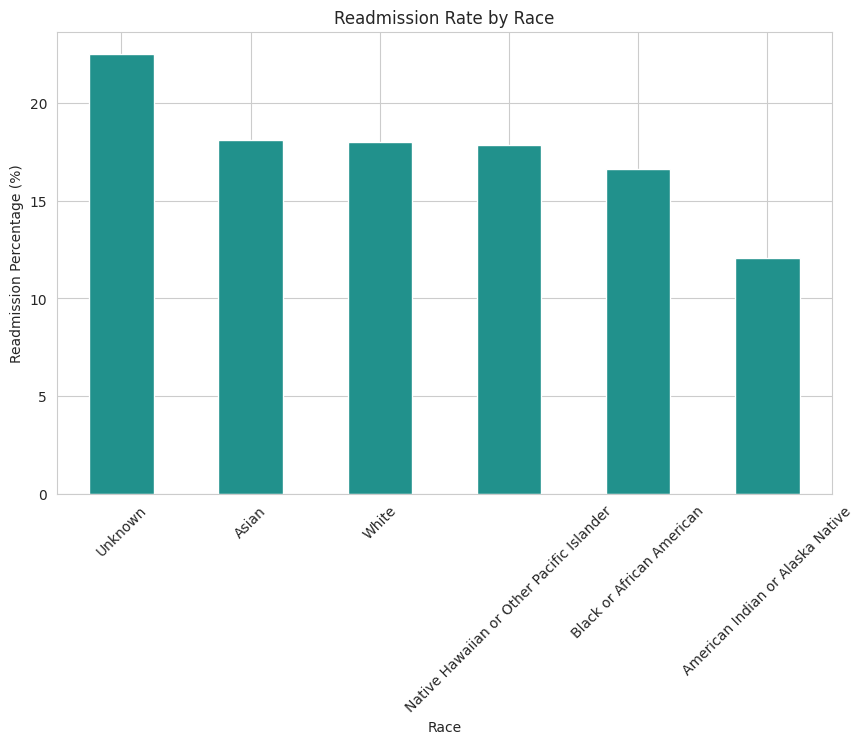

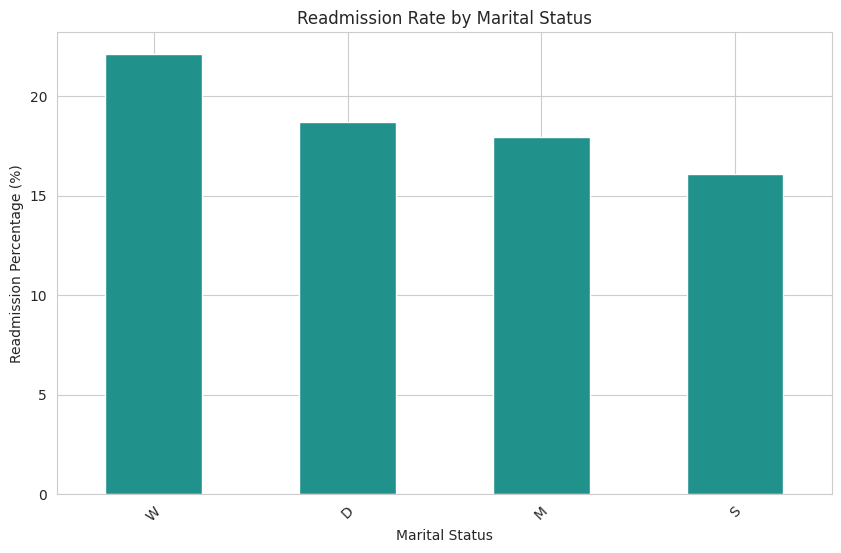

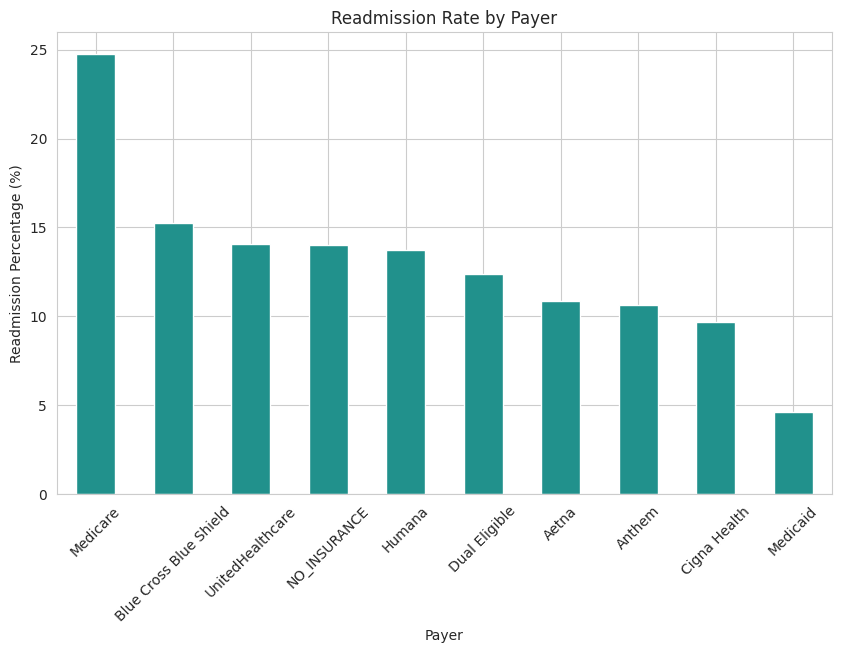

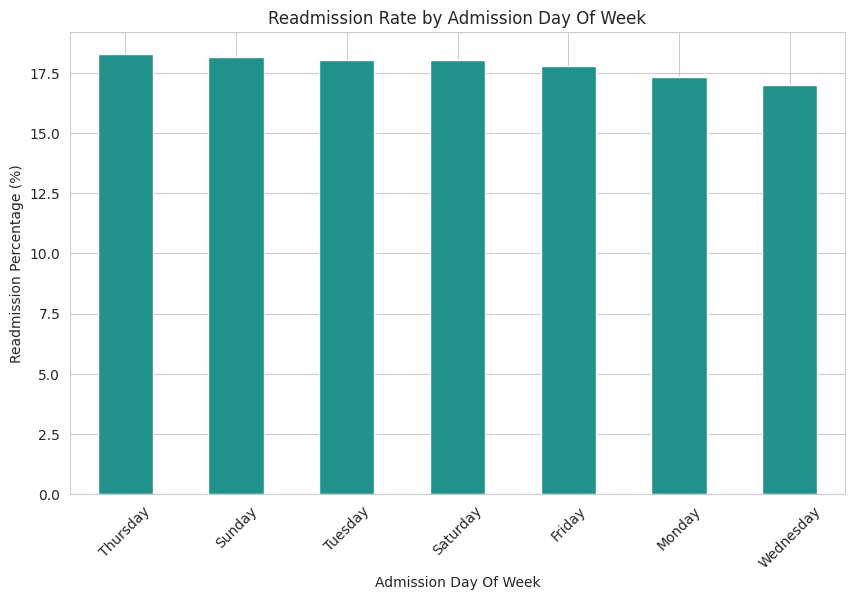

In [22]:
# Get a color from the viridis colormap
viridis_color = cm.viridis(0.5)  # Use a value like 0.5 to get a color from the middle

for col in categorical_features_to_plot:
    # Calculate the readmission rate (percentage of readmitted patients)
    readmit_rate_df = df.groupby(col)['readmitted_within_30_days'].value_counts(normalize=True).unstack()

    # Select only the 'readmitted' percentage (where value is 1)
    readmit_rate = readmit_rate_df[1] * 100

    # Sort the rates in descending order for better visualization
    readmit_rate = readmit_rate.sort_values(ascending=False)

    # Plot a simple bar chart of the readmission rates with the viridis color
    readmit_rate.plot(kind='bar', figsize=(10, 6), color=viridis_color)

    plt.title(f'Readmission Rate by {col.replace("_", " ").title()}')
    plt.ylabel('Readmission Percentage (%)')
    plt.xlabel(col.replace("_", " ").title())
    plt.xticks(rotation=45)
    plt.show()

# 5 Correlation and Final Steps
This cell performs the final step of your data exploration: correlation analysis.  It calculates the Pearson correlation coefficient for all the numeric features and the target variable, readmitted_within_30_days.

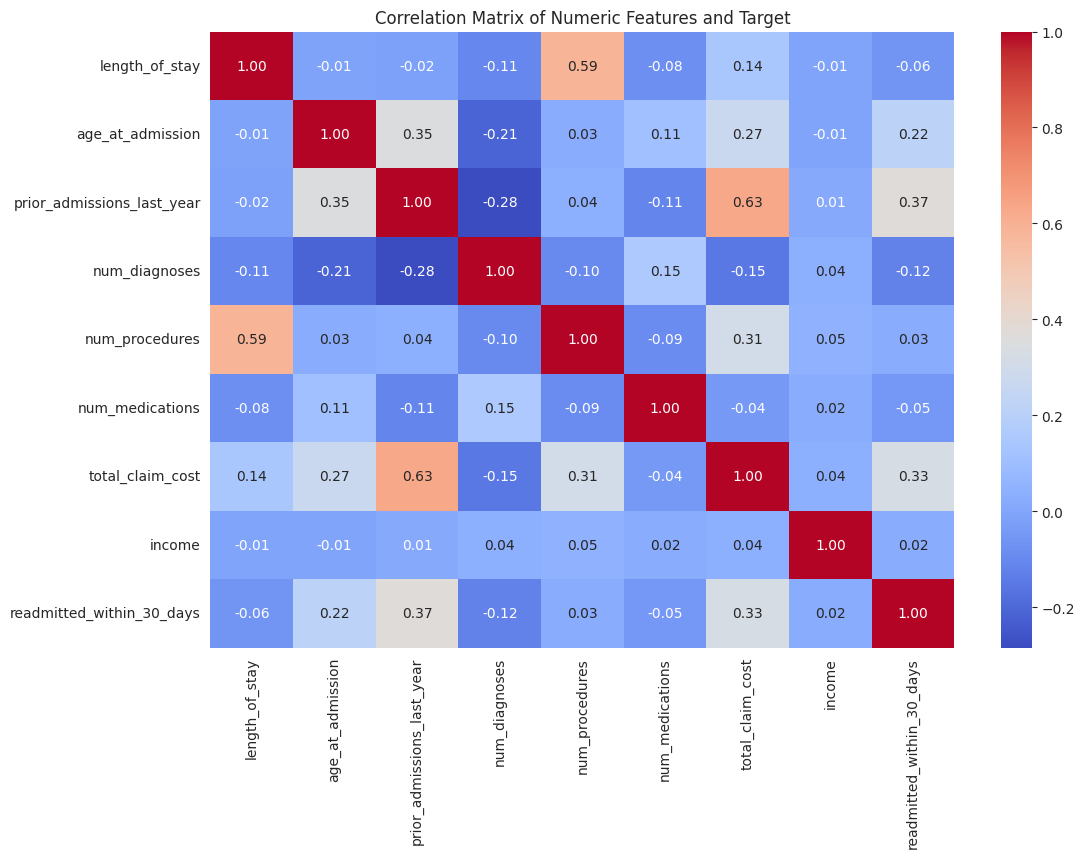

In [19]:
numeric_features = [
    'length_of_stay', 'age_at_admission', 'prior_admissions_last_year',
    'num_diagnoses', 'num_procedures', 'num_medications',
    'total_claim_cost', 'income'
]

# Create a list of all features for the correlation matrix, including the target
all_features_for_corr = numeric_features + ['readmitted_within_30_days']

plt.figure(figsize=(12, 8))
corr = df[all_features_for_corr].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features and Target')
plt.show()